In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [24]:
pip install pyshark
import pyshark
import pandas as pd

# Define a function to process packets
def process_packet(pkt):
    packet_info = {
        'timestamp': pkt.sniff_time,
        'source_ip': pkt.ip.src,
        'destination_ip': pkt.ip.dst,
        'protocol': pkt.transport_layer,
        'length': pkt.length
    }
    return packet_info

# Create an empty DataFrame to store packet data
df = pd.DataFrame(columns=['timestamp', 'source_ip', 'destination_ip', 'protocol', 'length'])

# Capture packets in real-time
capture = pyshark.LiveCapture(interface='your_interface_name')  # Specify your network interface
for packet in capture.sniff_continuously(packet_count=100):  # Adjust packet_count as needed
    if 'IP' in packet:  # Filter IP packets
        packet_data = process_packet(packet)
        df = df.append(packet_data, ignore_index=True)
        # Add preprocessing or ML model prediction steps here
        print(df.tail())  # Print the latest rows of DataFrame

SyntaxError: invalid syntax (1023616244.py, line 1)

In [2]:
#dataset=pd.read_csv('C:\\Users\\soura\\OneDrive\\Desktop\\CSV Files\\Training and Testing Sets\\UNSW_NB15_training-set.csv')

In [3]:
##print(unique_values)

['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']


In [4]:
#df = dataset.copy()

In [5]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['attack_cat_numeric'] = le.fit_transform(df['attack_cat'])

In [6]:
#from scipy.stats import pointbiserialr

#correlation, p_value = pointbiserialr(df['attack_cat_numeric'], df['ct_srv_src'])


In [7]:
#from scipy.stats import chi2_contingency

#contingency_table = pd.crosstab(df['attack_cat_numeric'], df['ct_srv_src'])
#chi2, _, _, _ = chi2_contingency(contingency_table)
#n = contingency_table.sum().sum()
#cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


In [8]:
#correlation, _ = pointbiserialr(df['attack_cat_numeric'], df['sbytes'])

In [9]:
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(10, 8))
#sns.heatmap([[correlation]], annot=True, fmt=".2f", cmap="coolwarm", cbar=False, ax=ax)
#ax.set_title('Correlation Heatmap')
#ax.set_xticklabels(['sttl'])
#ax.set_yticklabels(['label'])
#plt.show()


In [10]:
non_numeric_columns = df.select_dtypes(exclude='number').columns

In [11]:
numeric_df = df.drop(non_numeric_columns, axis=1)

In [12]:
correlation_matrix = numeric_df.corr()

<Axes: >

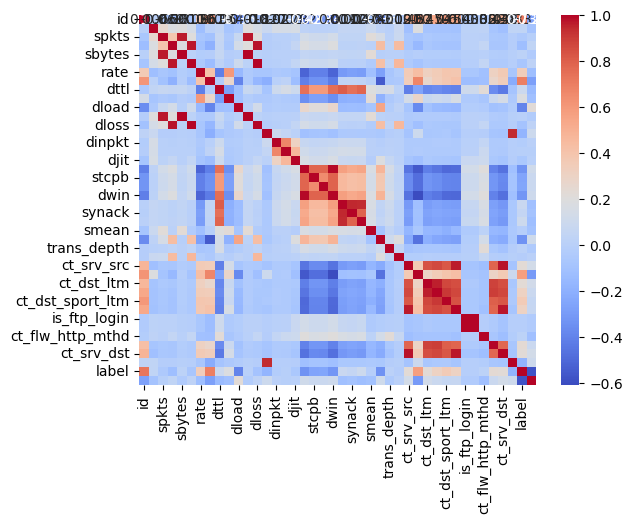

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [14]:
#df.tail(100)

In [15]:
#viewing particular row
#selected_row_index = 49616

In [16]:
#selected_row =df.iloc[selected_row_index]

In [17]:
#selected_row

In [18]:
X=df.drop(columns=['proto','service','state','attack_cat'])
df.drop(columns=['proto','service','state','attack_cat'])

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat_numeric
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,...,1,1,0,0,0,1,1,0,0,6
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,...,1,2,0,0,0,1,6,0,0,6
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,...,1,3,0,0,0,2,6,0,0,6
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,1,3,1,1,0,2,1,0,0,6
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,...,1,40,0,0,0,2,39,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,13,24,0,0,0,24,24,0,1,5
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,2,0,0,0,1,1,0,1,8
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,3,13,0,0,0,3,12,0,1,5
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,14,30,0,0,0,30,30,0,1,5


In [19]:
corr = X.corr()
corr_label = corr['label']
corr_label

id                    0.727173
dur                   0.036175
spkts                -0.052178
dpkts                -0.118591
sbytes                0.018576
dbytes               -0.076871
rate                  0.337979
sttl                  0.692741
dttl                  0.095049
sload                 0.182870
dload                -0.393739
sloss                -0.000640
dloss                -0.094685
sinpkt               -0.176110
dinpkt               -0.022887
sjit                 -0.007069
djit                 -0.060870
swin                 -0.333633
stcpb                -0.255006
dtcpb                -0.250340
dwin                 -0.319626
tcprtt                0.081584
synack                0.058299
ackdat                0.097364
smean                -0.010798
dmean                -0.341806
trans_depth           0.010801
response_body_len    -0.021361
ct_srv_src            0.229044
ct_state_ttl          0.577704
ct_dst_ltm            0.229887
ct_src_dport_ltm      0.305579
ct_dst_s

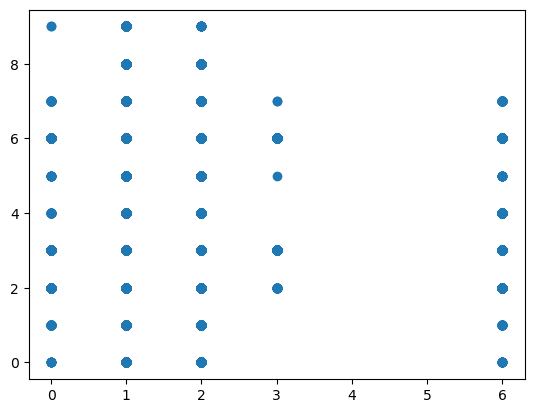

In [20]:
plt.scatter(df['ct_state_ttl'], df['attack_cat_numeric'])

In [21]:
#clf = IsolationForest(contamination=0.2)
#clf.fit(df)
#prediction = clf.predict(df)

In [22]:
from sklearn.model_selection import train_test_split

